In [21]:
pip install ../../

Processing /home/mehdi/Straph
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for straph: filename=straph-0.3-py3-none-any.whl size=123641 sha256=67f2ebd005fd69740fbbbf0db7b7921ff16a3bbcfbfc36255210a975482c832b
  Stored in directory: /tmp/pip-ephem-wheel-cache-6l8ebl9_/wheels/a5/b6/52/18c617da8ab7981501f28a49d398fa4ccca532d1baece44b1e
Successfully built straph
  Attempting uninstall: straph
    Found existing installation: straph 0.3
    Uninstalling straph-0.3:
      Successfully uninstalled straph-0.3
You should consider upgrading via the '/home/mehdi/sage/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may 

In [1]:
nb_erdos = 7

In [2]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,20)
import straph as sg
import straph.betweenness as bt
import straph.betweenness.volumes as vol
path_directory = "examples/"
S = sg.read_stream_graph(path_nodes=path_directory + "erdos"+str(nb_erdos)+"_nodes.sg",
                      path_links=path_directory + "erdos"+ str(nb_erdos)+ "_links.sg")
S.describe()

Nb of Nodes :  14
Nb of segmented nodes :  14.0
Nb of links :  50
Nb of segmented links :  70.0
Nb of event times :  57


In [3]:
bt.to_undirected(S)

<AxesSubplot:xlabel='t', ylabel='Nodes'>

findfont: Font family ['Garamond'] not found. Falling back to DejaVu Sans.


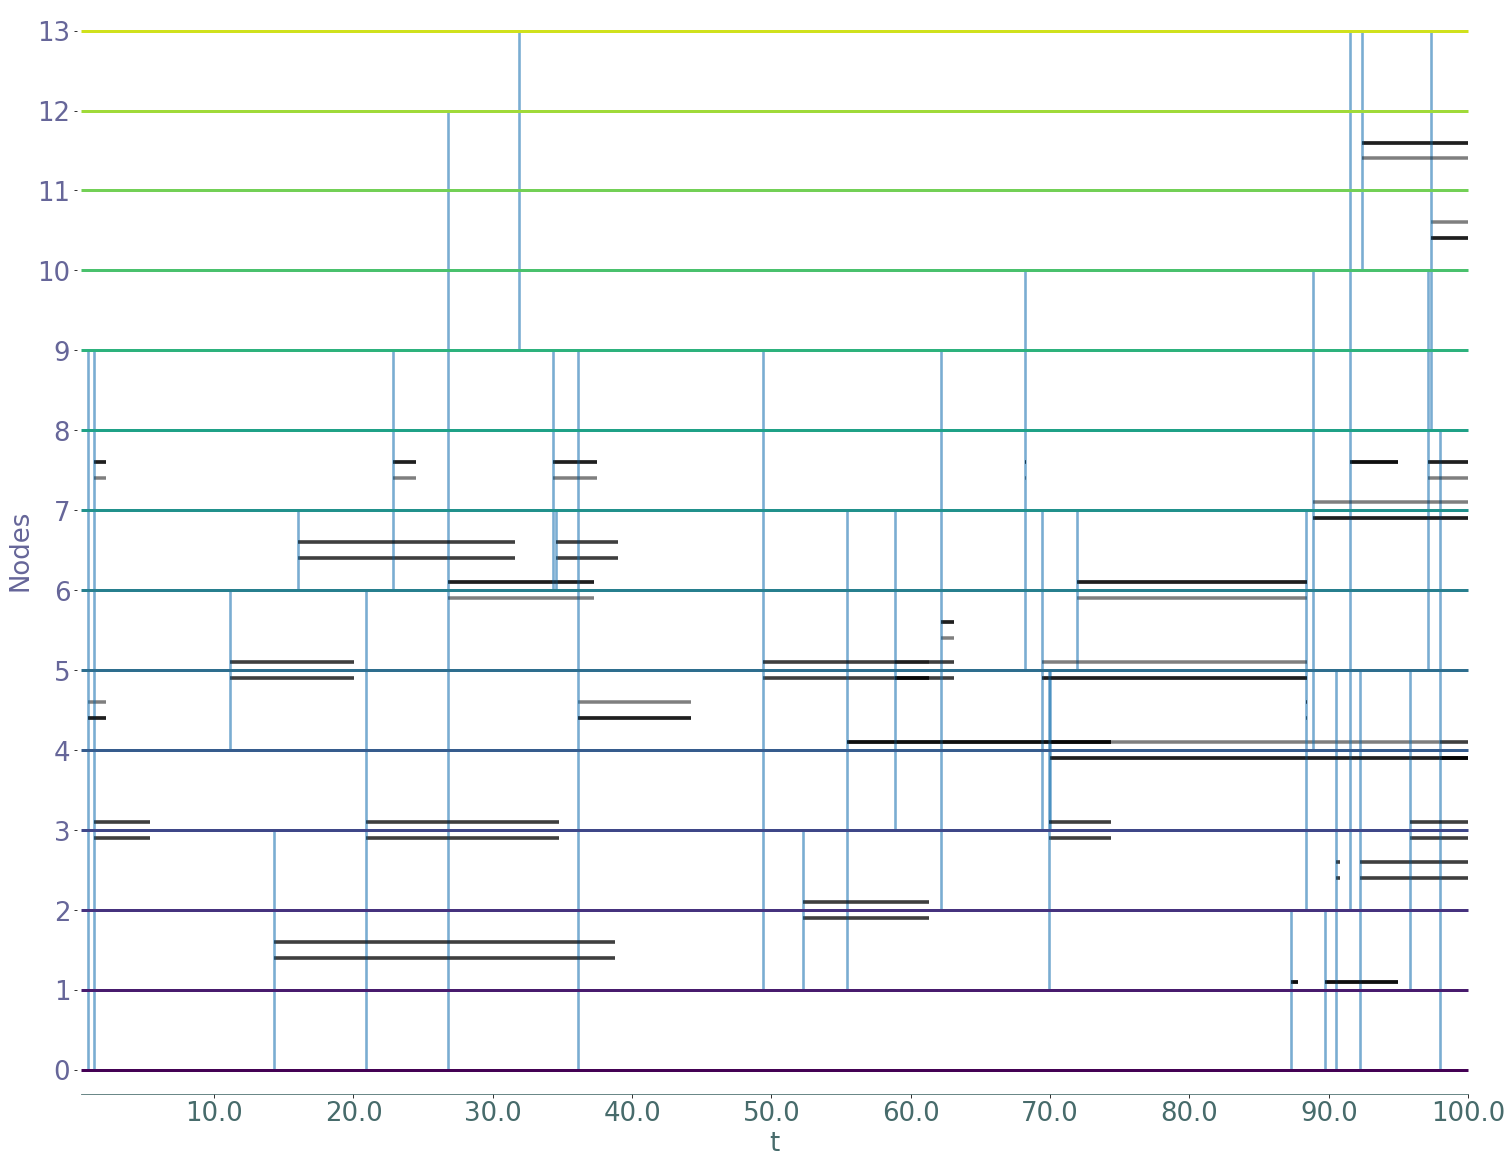

In [4]:
S.plot()

In [5]:
#for i in range(0,2*int(max(list(S.event_times())))):
#    S.add_point(i/2)
S.sg_to_streamfig("stream_example","eps")
nouveau = S.fragmented_stream_graph()

In [6]:
#nouveau.plot()
#plt.savefig("link_s_con.png",dpi=300,bbox_inches ='tight' )

In [7]:
events, events_reverse = bt.events_dic(nouveau)

In [8]:
link_ind = bt.link_index(nouveau)
neighbors, neighbors_inv = bt.neighbors_direct(nouveau)
unt = bt.until(nouveau, events, events_reverse)

In [9]:
node = 3

In [10]:
pre, cur_best = bt.dijkstra_directed(nouveau, node, events, events_reverse, neighbors, link_ind, neighbors_inv, unt)
cur_b_arr = bt. cur_best_to_array(nouveau, cur_best, events, events_reverse)

In [11]:
cur_best[5]

{0.4681866677584967: (-inf, inf),
 0.9297731520785214: (-inf, inf),
 1.3473452638627392: (-inf, inf),
 1.3745340718010575: (-inf, inf),
 2.2705848826676203: (-inf, inf),
 5.366649383520722: (-inf, inf),
 11.15629463066069: (-inf, inf),
 14.30357695973741: (-inf, inf),
 15.991500051513587: (-inf, inf),
 20.025396934264016: (-inf, inf),
 20.883061535855823: (-inf, inf),
 22.824483145790715: (-inf, inf),
 24.50998124617542: (-inf, inf),
 26.802228596129883: (-inf, inf),
 31.580681423839415: (-inf, inf),
 31.86742981088178: (-inf, inf),
 31.87636582309487: (-inf, inf),
 34.28669408140032: (-inf, inf),
 34.52922469691261: (-inf, inf),
 34.72546942366968: (-inf, inf),
 36.14836379657414: (-inf, inf),
 37.28958446227575: (-inf, inf),
 37.51429891392868: (-inf, inf),
 38.74272649845046: (-inf, inf),
 38.96489000188186: (-inf, inf),
 44.24498583884778: (-inf, inf),
 49.392847258972786: (-inf, inf),
 52.281264284333794: (-inf, inf),
 55.417004340588605: (-inf, inf),
 58.840410143866016: (-inf, i

In [12]:
lat = bt.latencies(nouveau, cur_b_arr, events, events_reverse)
lat_triplet, lat_rev_triplet = bt.latencies_without_0_and_rev(nouveau, lat, events)

In [13]:
lat_triplet[1]

[[38.74272649845046, 49.392847258972786, 3],
 [52.281264284333794, 52.281264284333794, 1],
 [55.417004340588605, 55.417004340588605, 1],
 [58.840410143866016, 58.840410143866016, 1],
 [61.288346679286164, 61.288346679286164, 1],
 [69.41372625960014, 69.41372625960014, 2],
 [69.93911541103392, 69.93911541103392, 2],
 [70.00204964386384, 70.00204964386384, 2],
 [71.9580970562756, 71.9580970562756, 2],
 [74.37658041006577, 74.37658041006577, 2],
 [95.81154941150723, 95.81154941150723, 2],
 [97.1010838104225, 97.1010838104225, 2],
 [97.37045208283706, 97.37045208283706, 2],
 [98.00702895390442, 98.00702895390442, 2],
 [100.0, 100.0, 2]]

In [14]:
G = bt.predecessor_graph(nouveau, pre,node)
GG = bt.graph_to_ordered(G, events, events_reverse)
Gp = bt.instant_graphs(G)
GT = bt.interval_graph(Gp)

********** (20.025396934264016, 20.883061535855823) **************
[(6, 20.883061535855823), (7, 20.883061535855823)]
///////////////////////
(7, 20.883061535855823) {} {(7, 20.883061535855823)}
(6, 20.883061535855823) {} {(6, 20.883061535855823)}
(7, 20.883061535855823) {} {(6, 20.883061535855823)}
********** (20.883061535855823, 22.824483145790715) **************
[(0, 22.824483145790715), (6, 22.824483145790715), (7, 22.824483145790715)]
///////////////////////
(7, 22.824483145790715) {} {(7, 22.824483145790715)}
(6, 22.824483145790715) {} {(6, 22.824483145790715)}
(7, 22.824483145790715) {} {(6, 22.824483145790715)}
(0, 22.824483145790715) {} {(0, 22.824483145790715)}
(6, 22.824483145790715) {} {(0, 22.824483145790715)}
********** (22.824483145790715, 24.50998124617542) **************
[(0, 24.50998124617542), (6, 24.50998124617542), (7, 24.50998124617542), (9, 24.50998124617542)]
///////////////////////
(9, 24.50998124617542) {} {(9, 24.50998124617542)}
(7, 24.50998124617542) {} {(7

In [15]:
import networkx as nx
GD = Gp[(70.95868453710477, 72.13340058339028)].graph
ren = dict()
for e in GD.nodes:
    ren[e] = (nouveau.node_to_label[e[0]],e[1])
#print(ren)
GN =  nx.relabel_nodes(GD, ren, copy=True)
fig, ax = plt.subplots(figsize=(30,30))
nx.draw_networkx(GN,arrows=True,width = 1,ax = ax)

KeyError: (70.95868453710477, 72.13340058339028)

In [16]:
for e in G.graph[(5,75.61304700994472)]:
    print(e)

KeyError: (5, 75.61304700994472)

In [17]:
GG.l_nei[(5, 75.61304700994472)]

KeyError: (5, 75.61304700994472)

In [18]:
import networkx as nx
for e in G.sources():
    for path in nx.all_simple_paths(G.graph, source=e, target=(5,43.20861816893123)):
        print(path)

In [19]:
edge = bt.edges(nouveau)

In [20]:
before, after = bt.volume_instantenuous(nouveau, G, events, events_reverse, edge)
mx = bt.max_volume_superposition(GT)
print(mx)

3 0 14.30357695973741 -1 -1
t1p,t2p 14.30357695973741 14.30357695973741
3 0 14.30357695973741 -1 -1
edge after 14.30357695973741 15.991500051513587
3 0 15.991500051513587 -1 -1
t1p,t2p 14.30357695973741 15.991500051513587
3 0 15.991500051513587 -1 -1
edge after 15.991500051513587 20.025396934264016
3 0 20.025396934264016 -1 -1
t1p,t2p 15.991500051513587 20.025396934264016
3 0 20.025396934264016 -1 -1
edge after 20.025396934264016 20.883061535855823
3 0 20.883061535855823 -1 -1
t1p,t2p 20.025396934264016 20.883061535855823
0 6 20.883061535855823 20.025396934264016 20.883061535855823
t1p,t2p 20.883061535855823 20.883061535855823
3 0 20.883061535855823 -1 -1
edge after 20.883061535855823 22.824483145790715
0 6 20.883061535855823 20.883061535855823 22.824483145790715
edge after 20.883061535855823 22.824483145790715
6 7 20.883061535855823 20.883061535855823 22.824483145790715
edge after 20.883061535855823 22.824483145790715
3 0 22.824483145790715 -1 -1
t1p,t2p 20.883061535855823 22.82448314

In [21]:
for e in G.graph[(3,77.72417383674939)]:
    print(e)

KeyError: (3, 77.72417383674939)

In [22]:
G.graph[(3,77.72417383674939)][(1, 84.75277347981506)]

KeyError: (3, 77.72417383674939)

In [23]:
G.graph[(3,77.72417383674939)][(5, 84.75277347981506)]

KeyError: (3, 77.72417383674939)

In [24]:
after[4]

{0.4681866677584967: False,
 0.9297731520785214: False,
 1.3473452638627392: False,
 1.3745340718010575: False,
 2.2705848826676203: False,
 5.366649383520722: False,
 11.15629463066069: False,
 14.30357695973741: False,
 15.991500051513587: False,
 20.025396934264016: False,
 20.883061535855823: False,
 22.824483145790715: False,
 24.50998124617542: False,
 26.802228596129883: False,
 31.580681423839415: False,
 31.86742981088178: False,
 31.87636582309487: False,
 34.28669408140032: False,
 34.52922469691261: False,
 34.72546942366968: False,
 36.14836379657414: False,
 37.28958446227575: False,
 37.51429891392868: False,
 38.74272649845046: False,
 38.96489000188186: False,
 44.24498583884778: False,
 49.392847258972786: False,
 52.281264284333794: False,
 55.417004340588605: False,
 58.840410143866016: False,
 61.288346679286164: False,
 62.16813153516843: False,
 63.13325303729901: False,
 68.18120522345966: False,
 68.30774508741433: False,
 69.41372625960014: False,
 69.93911541

In [25]:
before[4]

{0.4681866677584967: False,
 0.9297731520785214: False,
 1.3473452638627392: False,
 1.3745340718010575: False,
 2.2705848826676203: False,
 5.366649383520722: False,
 11.15629463066069: False,
 14.30357695973741: False,
 15.991500051513587: False,
 20.025396934264016: False,
 20.883061535855823: False,
 22.824483145790715: False,
 24.50998124617542: False,
 26.802228596129883: False,
 31.580681423839415: False,
 31.86742981088178: False,
 31.87636582309487: False,
 34.28669408140032: False,
 34.52922469691261: False,
 34.72546942366968: False,
 36.14836379657414: False,
 37.28958446227575: False,
 37.51429891392868: False,
 38.74272649845046: False,
 38.96489000188186: False,
 44.24498583884778: False,
 49.392847258972786: False,
 52.281264284333794: False,
 55.417004340588605: False,
 58.840410143866016: False,
 61.288346679286164: False,
 62.16813153516843: False,
 63.13325303729901: False,
 68.18120522345966: False,
 68.30774508741433: False,
 69.41372625960014: False,
 69.93911541

In [26]:
sigma = bt.volume_metapaths_at_t(G, node, cur_best, mx)
f_edge = bt.dictionary_first_edge(G,  cur_best)
sigma_r = bt.optimal_with_resting_con(nouveau, node, f_edge, events, G, sigma, cur_best, unt)

In [27]:
sigma_r

{(0, 0.4681866677584967): vol(0,0),
 (0, 0.9297731520785214): vol(0,0),
 (0, 1.3473452638627392): vol(0,0),
 (0, 1.3745340718010575): vol(0,0),
 (0, 2.2705848826676203): vol(0,0),
 (0, 5.366649383520722): vol(0,0),
 (0, 11.15629463066069): vol(0,0),
 (0, 14.30357695973741): vol(1,0),
 (0, 15.991500051513587): vol(1,0),
 (0, 20.025396934264016): vol(1,0),
 (0, 20.883061535855823): vol(1,0),
 (0, 22.824483145790715): vol(1,0),
 (0, 24.50998124617542): vol(1,0),
 (0, 26.802228596129883): vol(1,0),
 (0, 31.580681423839415): vol(1,0),
 (0, 31.86742981088178): vol(1,0),
 (0, 31.87636582309487): vol(1,0),
 (0, 34.28669408140032): vol(1,0),
 (0, 34.52922469691261): vol(1,0),
 (0, 34.72546942366968): vol(1,0),
 (0, 36.14836379657414): vol(1,0),
 (0, 37.28958446227575): vol(1,0),
 (0, 37.51429891392868): vol(1,0),
 (0, 38.74272649845046): vol(1,0),
 (0, 38.96489000188186): vol(1,0),
 (0, 44.24498583884778): vol(1,0),
 (0, 49.392847258972786): vol(1,0),
 (0, 52.281264284333794): vol(1,0),
 (0, 55

In [28]:
lat_triplet[5]

[[69.93911541103392, 69.93911541103392, 3],
 [70.00204964386384, 70.00204964386384, 1],
 [71.9580970562756, 71.9580970562756, 1],
 [74.37658041006577, 74.37658041006577, 1],
 [87.32479046897582, 87.32479046897582, 1],
 [87.81497098706814, 87.81497098706814, 1],
 [88.37897487045896, 88.37897487045896, 1],
 [88.43224950613805, 88.43224950613805, 1],
 [88.87050514130867, 88.87050514130867, 1],
 [89.74988578348281, 89.74988578348281, 1],
 [90.50501037764255, 90.50501037764255, 1],
 [90.8116749344082, 90.8116749344082, 1],
 [91.51014453612402, 91.51014453612402, 1],
 [92.21183319084625, 92.21183319084625, 1],
 [92.37737797143672, 92.37737797143672, 1],
 [94.94368340788559, 94.94368340788559, 1],
 [95.81154941150723, 95.81154941150723, 1],
 [97.1010838104225, 97.1010838104225, 1],
 [97.37045208283706, 97.37045208283706, 1],
 [98.00702895390442, 98.00702895390442, 1],
 [100.0, 100.0, 1]]

In [29]:
contri[5]

NameError: name 'contri' is not defined

In [30]:
sigma_r[(5, 75.61304700994472)]

KeyError: (5, 75.61304700994472)

In [31]:
GG.l_nei[(1, 79.96710253478658)]

KeyError: (1, 79.96710253478658)

In [32]:
contri, prev_next = bt.contribution_each_latency_con(nouveau, lat_rev_triplet,events[0],events[len(events)-1], before, after)
latence_arrival = {v : { y: [x,z] for (x,y,z) in lat_triplet[v] }  for v in nouveau.nodes }
latence_depar = {v : { x : [y,z] for (x,y,z) in lat_triplet[v] }  for v in nouveau.nodes }

In [33]:
prev_next[0:8]

[{},
 {},
 {},
 {14.30357695973741: [15.991500051513587,
   20.025396934264016,
   20.883061535855823,
   22.824483145790715,
   24.50998124617542,
   26.802228596129883,
   31.580681423839415,
   31.86742981088178,
   31.87636582309487,
   34.28669408140032,
   34.52922469691261,
   34.72546942366968,
   36.14836379657414,
   37.28958446227575,
   37.51429891392868,
   38.74272649845046,
   52.281264284333794,
   55.417004340588605,
   58.840410143866016,
   61.288346679286164,
   69.41372625960014,
   69.93911541103392,
   70.00204964386384,
   71.9580970562756,
   74.37658041006577,
   87.32479046897582,
   87.81497098706814,
   88.37897487045896,
   88.43224950613805,
   88.87050514130867,
   89.74988578348281,
   90.50501037764255,
   90.8116749344082,
   91.51014453612402,
   92.21183319084625,
   92.37737797143672,
   94.94368340788559,
   95.81154941150723,
   97.1010838104225,
   97.37045208283706,
   98.00702895390442,
   100.0],
  15.991500051513587: [14.30357695973741,
   2

In [34]:
contri[6]

{20.883061535855823: (0.4681866677584967, 20.883061535855823),
 22.824483145790715: (22.824483145790715, 22.824483145790715),
 24.50998124617542: (24.50998124617542, 24.50998124617542),
 26.802228596129883: (26.802228596129883, 26.802228596129883),
 31.580681423839415: (31.580681423839415, 31.580681423839415),
 31.86742981088178: (31.86742981088178, 31.86742981088178),
 31.87636582309487: (31.87636582309487, 31.87636582309487),
 34.28669408140032: (34.28669408140032, 34.28669408140032),
 34.52922469691261: (34.52922469691261, 34.52922469691261),
 34.72546942366968: (34.72546942366968, 100.0),
 36.14836379657414: (34.72546942366968, 36.14836379657414),
 37.28958446227575: (37.28958446227575, 37.28958446227575),
 37.51429891392868: (37.51429891392868, 100.0)}

In [35]:
deltasvvt = bt.dictionary_svvt(G, node, latence_arrival, contri, prev_next, sigma_r,  latence_depar)

In [36]:
deltasvvt

{(3, 14.30357695973741): vol(0,0),
 (0, 14.30357695973741): vol(0,0),
 (3, 15.991500051513587): vol(0,0),
 (0, 15.991500051513587): vol(0,0),
 (3, 20.025396934264016): vol(0,0),
 (0, 20.025396934264016): vol(0,0),
 (3, 20.883061535855823): vol(0,0),
 (0, 20.883061535855823): vol(0,0),
 (3, 22.824483145790715): vol(0,0),
 (0, 22.824483145790715): vol(0,0),
 (3, 24.50998124617542): vol(0,0),
 (0, 24.50998124617542): vol(0,0),
 (3, 26.802228596129883): vol(0,0),
 (0, 26.802228596129883): vol(0,0),
 (3, 31.580681423839415): vol(0,0),
 (0, 31.580681423839415): vol(0,0),
 (3, 31.86742981088178): vol(0,0),
 (0, 31.86742981088178): vol(0,0),
 (3, 31.87636582309487): vol(0,0),
 (0, 31.87636582309487): vol(0,0),
 (3, 34.28669408140032): vol(0,0),
 (0, 34.28669408140032): vol(0,0),
 (3, 34.52922469691261): vol(0,0),
 (0, 34.52922469691261): vol(0,0),
 (3, 34.72546942366968): vol(0,0),
 (0, 34.72546942366968): vol(0,0),
 (3, 36.14836379657414): vol(0,0),
 (0, 36.14836379657414): vol(0,0),
 (3, 37.

In [37]:
contribution = bt.general_contribution_from_node(nouveau, G, node, GG, sigma_r, deltasvvt, events, events_reverse, pre, GT, unt)

v,t 3 100.0 l_nei[(v,t)] [[100.0, [5]]]
v,t 5 100.0 l_nei[(v,t)] [[100.0, [0, 1, 10]]]
v,t 0 100.0 l_nei[(v,t)] [[100.0, [8]]]
v,t 8 100.0 l_nei[(v,t)] []
v,t 1 100.0 l_nei[(v,t)] []
v,t 10 100.0 l_nei[(v,t)] [[100.0, [4, 13]]]
v,t 4 100.0 l_nei[(v,t)] []
v,t 13 100.0 l_nei[(v,t)] []
v,t 3 98.00702895390442 l_nei[(v,t)] [[98.00702895390442, [5]]]
v,t 5 98.00702895390442 l_nei[(v,t)] [[98.00702895390442, [0, 1, 10]]]
v,t 0 98.00702895390442 l_nei[(v,t)] [[98.00702895390442, [8]]]
v,t 8 98.00702895390442 l_nei[(v,t)] []
v,t 1 98.00702895390442 l_nei[(v,t)] []
v,t 10 98.00702895390442 l_nei[(v,t)] [[98.00702895390442, [4, 13]]]
v,t 4 98.00702895390442 l_nei[(v,t)] []
v,t 13 98.00702895390442 l_nei[(v,t)] []
v,t 3 97.37045208283706 l_nei[(v,t)] [[97.37045208283706, [5]]]
v,t 5 97.37045208283706 l_nei[(v,t)] [[97.37045208283706, [0, 1, 10]]]
v,t 0 97.37045208283706 l_nei[(v,t)] []
v,t 1 97.37045208283706 l_nei[(v,t)] []
v,t 10 97.37045208283706 l_nei[(v,t)] [[97.37045208283706, [4, 13]]]
v,

In [38]:
contribution

{8: {100.0: vol(0,0),
  98.00702895390442: vol(0,0),
  97.37045208283706: vol(0,0),
  0.4681866677584967: vol(0,0),
  0.9297731520785214: vol(0,0),
  1.3473452638627392: vol(0,0),
  1.3745340718010575: vol(0,0),
  2.2705848826676203: vol(0,0),
  5.366649383520722: vol(0,0),
  11.15629463066069: vol(0,0),
  14.30357695973741: vol(0,0),
  15.991500051513587: vol(0,0),
  20.025396934264016: vol(0,0),
  20.883061535855823: vol(0,0),
  22.824483145790715: vol(0,0),
  24.50998124617542: vol(0,0),
  26.802228596129883: vol(0,0),
  31.580681423839415: vol(0,0),
  31.86742981088178: vol(0,0),
  31.87636582309487: vol(0,0),
  34.28669408140032: vol(0,0),
  34.52922469691261: vol(0,0),
  34.72546942366968: vol(0,0),
  36.14836379657414: vol(0,0),
  37.28958446227575: vol(0,0),
  37.51429891392868: vol(0,0),
  38.74272649845046: vol(0,0),
  38.96489000188186: vol(0,0),
  44.24498583884778: vol(0,0),
  49.392847258972786: vol(0,0),
  52.281264284333794: vol(0,0),
  55.417004340588605: vol(0,0),
  5

In [42]:
contribution[13]

{100.0: vol(0,0),
 98.00702895390442: vol(0,0),
 97.37045208283706: vol(0,0),
 97.1010838104225: vol(0,0),
 95.81154941150723: vol(0,0),
 94.94368340788559: vol(0,0),
 92.37737797143672: vol(0,0),
 92.21183319084625: vol(0,0),
 91.51014453612402: vol(63.39300074473925,0),
 31.87636582309487: vol(0,0),
 31.86742981088178: vol(1433.917895523396,0),
 0.4681866677584967: vol(0,0),
 0.9297731520785214: vol(0,0),
 1.3473452638627392: vol(0,0),
 1.3745340718010575: vol(0,0),
 2.2705848826676203: vol(0,0),
 5.366649383520722: vol(0,0),
 11.15629463066069: vol(0,0),
 14.30357695973741: vol(0,0),
 15.991500051513587: vol(0,0),
 20.025396934264016: vol(0,0),
 20.883061535855823: vol(0,0),
 22.824483145790715: vol(0,0),
 24.50998124617542: vol(0,0),
 26.802228596129883: vol(0,0),
 31.580681423839415: vol(0,0),
 34.28669408140032: vol(0,0),
 34.52922469691261: vol(0,0),
 34.72546942366968: vol(0,0),
 36.14836379657414: vol(0,0),
 37.28958446227575: vol(0,0),
 37.51429891392868: vol(0,0),
 38.742726

In [40]:
(2, 80.41206683462686) in G.nodes()

False

In [41]:
G.graph[(5, 75.61304700994472)][(2, 80.41206683462686)]

KeyError: (5, 75.61304700994472)

In [41]:
for e in G.sources():
    print(e)

(8, 38.63106480839467)
(8, 42.80254801228882)
(8, 44.366589142806795)
(8, 44.6890894123902)
(8, 48.193417313173406)
(8, 52.399105148503374)
(8, 52.49073257040008)
(8, 54.07400826577283)
(8, 54.52519781573363)
(8, 56.28480941635639)
(8, 59.34925517493079)
(8, 59.629901380901956)
(8, 59.94215142732125)
(8, 61.35534226382198)
(8, 74.82282625952246)
(8, 75.61304700994472)


In [42]:
import networkx as nx
for e in G.sources():
    for path in nx.all_simple_paths(G.graph, source=e, target=(2, 80.41206683462686)):
        print(path)

[(8, 75.61304700994472), (5, 75.61304700994472), (2, 80.41206683462686)]


In [43]:
import networkx as nx
for e in G.sources():
    for path in nx.all_simple_paths(G.graph, source=e, target=(2, 79.73349567329026)):
        print(path)

[(8, 75.61304700994472), (3, 75.61304700994472), (2, 79.73349567329026)]
[(8, 75.61304700994472), (5, 75.61304700994472), (2, 79.73349567329026)]


In [44]:
deltasvvt[(2, 80.41206683462686)]

vol(0,0)

In [45]:
sigma_r[(2, 80.41206683462686)]

vol(8.58600037648317,1)

In [46]:
sigma_r[ (2, 79.73349567329026)]

vol(7.907429215146578,1)

In [46]:
lat_triplet[13]

[[24.50998124617542, 31.86742981088178, 4],
 [90.8116749344082, 91.51014453612402, 4],
 [92.21183319084625, 92.21183319084625, 4],
 [92.37737797143672, 92.37737797143672, 4],
 [94.94368340788559, 94.94368340788559, 4],
 [97.1010838104225, 97.1010838104225, 3],
 [97.37045208283706, 97.37045208283706, 3],
 [98.00702895390442, 98.00702895390442, 3],
 [100.0, 100.0, 3]]

In [47]:
prev_next[13]

{}

In [49]:
contri[13]

{31.86742981088178: (0.4681866677584967, 91.51014453612402),
 91.51014453612402: (0.4681866677584967, 91.51014453612402),
 92.21183319084625: (92.21183319084625, 92.21183319084625),
 92.37737797143672: (92.37737797143672, 92.37737797143672),
 94.94368340788559: (94.94368340788559, 97.1010838104225),
 97.1010838104225: (97.1010838104225, 97.1010838104225),
 97.37045208283706: (97.37045208283706, 97.37045208283706),
 98.00702895390442: (98.00702895390442, 98.00702895390442),
 100.0: (100.0, 100.0)}

In [48]:
deltasvvt[(13,91.51014453612402)]

vol(0,0)

In [50]:
after[13]

{0.4681866677584967: False,
 0.9297731520785214: False,
 1.3473452638627392: False,
 1.3745340718010575: False,
 2.2705848826676203: False,
 5.366649383520722: False,
 11.15629463066069: False,
 14.30357695973741: False,
 15.991500051513587: False,
 20.025396934264016: False,
 20.883061535855823: False,
 22.824483145790715: False,
 24.50998124617542: False,
 26.802228596129883: False,
 31.580681423839415: False,
 31.86742981088178: False,
 31.87636582309487: False,
 34.28669408140032: False,
 34.52922469691261: False,
 34.72546942366968: False,
 36.14836379657414: False,
 37.28958446227575: False,
 37.51429891392868: False,
 38.74272649845046: False,
 38.96489000188186: False,
 44.24498583884778: False,
 49.392847258972786: False,
 52.281264284333794: False,
 55.417004340588605: False,
 58.840410143866016: False,
 61.288346679286164: False,
 62.16813153516843: False,
 63.13325303729901: False,
 68.18120522345966: False,
 68.30774508741433: False,
 69.41372625960014: False,
 69.93911541

In [51]:
import networkx as nx
for e in G.sources():
    for path in nx.all_simple_paths(G.graph, source=e, target=(13, 91.51014453612402)):
        print(path)

[(3, 90.8116749344082), (5, 90.8116749344082), (0, 90.8116749344082), (2, 90.8116749344082), (13, 91.51014453612402)]
[(3, 90.8116749344082), (5, 90.8116749344082), (0, 90.8116749344082), (2, 91.51014453612402), (13, 91.51014453612402)]


In [52]:
import networkx as nx
for e in G.sources():
    for path in nx.all_simple_paths(G.graph, source=e, target=(13, 91.51014453612402)):
        print("nouveau")
        for i in range(0,len(path)-1):
            print(G.graph[path[i]][path[i+1]]["interval"])
            

nouveau
(90.50501037764255, 90.8116749344082)
(90.50501037764255, 90.8116749344082)
(90.50501037764255, 90.8116749344082)
(91.51014453612402, 91.51014453612402)
nouveau
(90.50501037764255, 90.8116749344082)
(90.50501037764255, 90.8116749344082)
(90.8116749344082, 91.51014453612402)
(91.51014453612402, 91.51014453612402)


In [55]:
import networkx as nx
for e in G.sources():
    for path in nx.all_simple_paths(G.graph, source=e, target=(13, 92.21183319084625)):
        print(path)

[(3, 92.21183319084625), (5, 92.21183319084625), (0, 92.21183319084625), (2, 92.21183319084625), (13, 92.21183319084625)]


In [53]:
import networkx as nx
for e in G.sources():
    for path in nx.all_simple_paths(G.graph, source=e, target=(13, 92.21183319084625)):
        print("nouveau")
        for i in range(0,len(path)-1):
            print(G.graph[path[i]][path[i+1]]["interval"])
            

nouveau
(91.51014453612402, 92.21183319084625)
(92.21183319084625, 92.21183319084625)
(91.51014453612402, 92.21183319084625)
(91.51014453612402, 92.21183319084625)


In [54]:
cur_best[13]

{0.4681866677584967: (-inf, inf),
 0.9297731520785214: (-inf, inf),
 1.3473452638627392: (-inf, inf),
 1.3745340718010575: (-inf, inf),
 2.2705848826676203: (-inf, inf),
 5.366649383520722: (-inf, inf),
 11.15629463066069: (-inf, inf),
 14.30357695973741: (-inf, inf),
 15.991500051513587: (-inf, inf),
 20.025396934264016: (-inf, inf),
 20.883061535855823: (-inf, inf),
 22.824483145790715: (-inf, inf),
 24.50998124617542: (-inf, inf),
 26.802228596129883: (-inf, inf),
 31.580681423839415: (-inf, inf),
 31.86742981088178: (24.50998124617542, 4),
 31.87636582309487: (24.50998124617542, 4),
 34.28669408140032: (-inf, inf),
 34.52922469691261: (-inf, inf),
 34.72546942366968: (-inf, inf),
 36.14836379657414: (-inf, inf),
 37.28958446227575: (-inf, inf),
 37.51429891392868: (-inf, inf),
 38.74272649845046: (-inf, inf),
 38.96489000188186: (-inf, inf),
 44.24498583884778: (-inf, inf),
 49.392847258972786: (-inf, inf),
 52.281264284333794: (-inf, inf),
 55.417004340588605: (-inf, inf),
 58.840